# Automobiles Dataset
---

In [1]:
# Importing the modules:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset:
df = pd.read_csv('../../Datasets/automobiles.data')

In [3]:
# exploring the data:
df.head()
# df.tail(7)
# df.info()
# df.describe()    # Uncomment anyone of them.

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Data Wrangling
---

## What is the purpose of data wrangling?
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


## Handling missing values:
Note that the missing values are indicated with the'?' symbol

In [4]:
df.replace('?', np.nan,inplace=True)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
# changing the column names:
df.columns = headers

In [5]:
# Missing values count:
missing = df.isnull()   # This creates a nul or not boolean mask

for column in missing.columns.values:
    print(column)
    print(missing[column].value_counts())
    print('')

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


In [6]:
# replacing by mean:

mean1 = df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.nan, mean1, inplace=True)

mean2 = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, mean2, inplace=True)

mean3 = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, mean3, inplace=True)

mean4 = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan, mean4, inplace=True)

mean5 = df['peak-rpm'].astype('float').mean()
df['peak-rpm'].replace(np.nan, mean5, inplace=True)    # Note that, for obvious reasons, data formatting took place.

In [7]:
# Replacing by frequency:
df['num-of-doors'].describe()

count      202
unique       2
top       four
freq       114
Name: num-of-doors, dtype: object

In [8]:
df['num-of-doors'].replace(np.nan,'four',inplace = True)

In [9]:
# Dropping rows:
df.dropna(subset='price', axis=0, inplace=True)

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [10]:
# Listing all the data types:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


In [11]:
# Converting the data types to a proper format:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


In [12]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [13]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [14]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height'] / df['height'].max()

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


(array([44., 45., 47., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

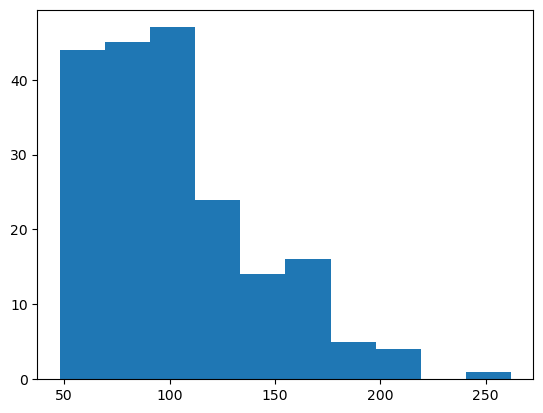

In [15]:
df['horsepower'] = df['horsepower'].astype('int')
plt.hist(df['horsepower'])

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


In [16]:
bins = np.linspace(df.horsepower.min(), df.horsepower.max(),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [17]:
df['horsepower-binned'] = pd.cut(df.horsepower, bins, labels=['low','medium','high'])
df[['horsepower-binned','horsepower']].head(10)

,horsepower-binned,horsepower
0,low,111
1,medium,154
2,low,102
3,low,115
4,low,110
5,low,110
6,low,110
7,medium,140
9,low,101
10,low,101


Text(0.5, 1.0, 'horsepower bins')

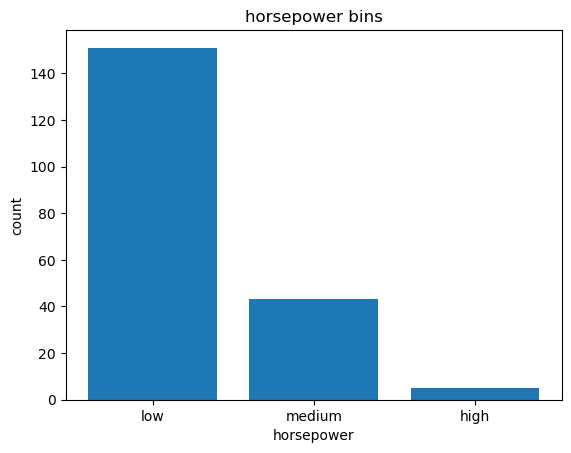

In [18]:
plt.bar(['low','medium','high'], df['horsepower-binned'].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


(array([152.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

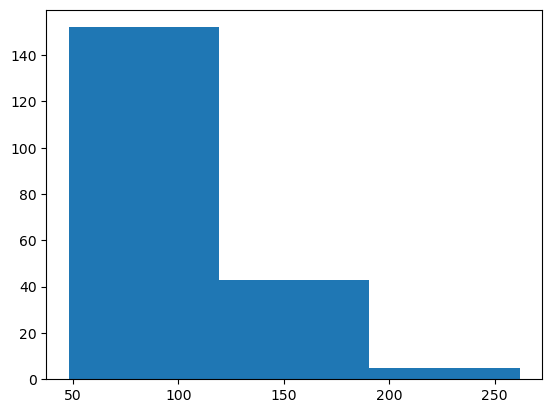

In [19]:
plt.hist(df['horsepower'], bins=3)

<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [20]:
dummy = pd.get_dummies(df['fuel-type'])
dummy.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
dummy.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

In [22]:
# Merging the dataframes:
df = pd.concat([df,dummy],axis = 1)
# drop original column "fuel-type" from "df"
df.drop('fuel-type', axis= 1, inplace=True)

In [23]:
# Doing the same with the column Aspiration:
dummy_aspiration = pd.get_dummies(df.aspiration)
dummy_aspiration.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
pd.concat([df,dummy_aspiration], axis=1)
df.drop('aspiration',axis = 1,inplace=True)

Now that we have finished cleaning the data, lets save it into a new csv file:

In [24]:
# df.to_csv('clean.csv')     #Commented because I don't want to resave it everytime I run the notebook

### **Ennd Of Week Two**
---

## Analyzing Individual Feature Patterns Using Visualization

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [25]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,-0.181073,0.074617,0.284033,-0.030158,-0.033159,-0.083327,0.062423,-0.195381,0.195381
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,-0.114738,0.217322,0.239580,-0.225255,0.181247,0.133999,0.238712,-0.101574,0.101574
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,0.249689,0.375610,-0.365045,-0.480029,0.584953,0.589147,0.484047,0.306706,-0.306706
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,0.159203,0.580583,-0.286688,-0.667658,0.708466,0.691044,0.659174,0.210616,-0.210616
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,0.189008,0.617115,-0.247337,-0.638155,0.739845,0.752795,0.677111,0.243448,-0.243448
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,0.259526,-0.085829,-0.315820,-0.057087,0.088903,0.137284,0.008923,0.281198,-0.281198
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,0.156444,0.758076,-0.279422,-0.750390,0.837217,0.834420,0.785868,0.221082,-0.221082
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,0.029005,0.822689,-0.256681,-0.651002,0.783593,0.872337,0.745337,0.070925,-0.070925
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,0.002034,0.566807,-0.267061,-0.581272,0.558675,0.543433,0.553954,0.055395,-0.055395
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,0.186780,0.100881,-0.066021,-0.040547,0.051032,0.083298,0.041310,0.240046,-0.240046


In [26]:
# Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002034,0.566807
stroke,-0.051087,1.000000,0.186780,0.100881
compression-ratio,0.002034,0.186780,1.000000,-0.214260
horsepower,0.566807,0.100881,-0.214260,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


<AxesSubplot:xlabel='engine-size', ylabel='price'>

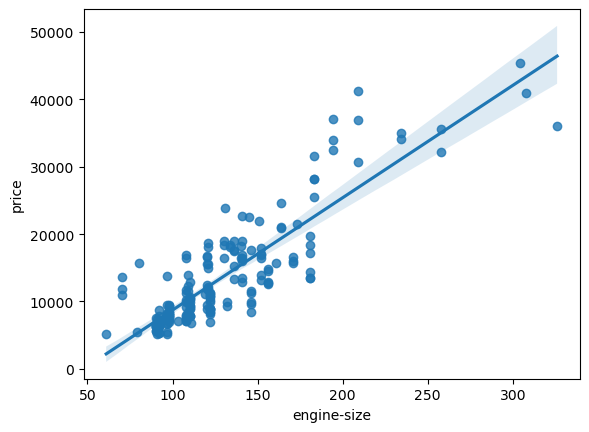

In [27]:
sns.regplot(x='engine-size', y='price', data=df)

In [28]:
# Note the strong positive correlation:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


From now on, I will go through the analysis in the week lab, and right here only the analysis to be saved.

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


<AxesSubplot:xlabel='body-style', ylabel='price'>

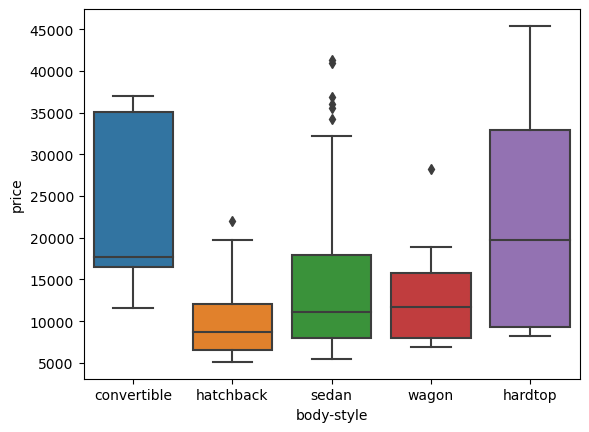

In [29]:
sns.boxplot(x='body-style', y='price', data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<h2 id="discriptive_statistics">Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [30]:
df['engine-location'].value_counts()

front    197
rear       3
Name: engine-location, dtype: int64

<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="basic_grouping">Basics of Grouping</h2>

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [31]:
temp = df.groupby(['drive-wheels', 'body-style'],as_index=False)['price'].mean()
temp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [32]:
pivot = pd.pivot(index='drive-wheels', columns='body-style', data = temp)
pivot.fillna(0, inplace=True)
pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

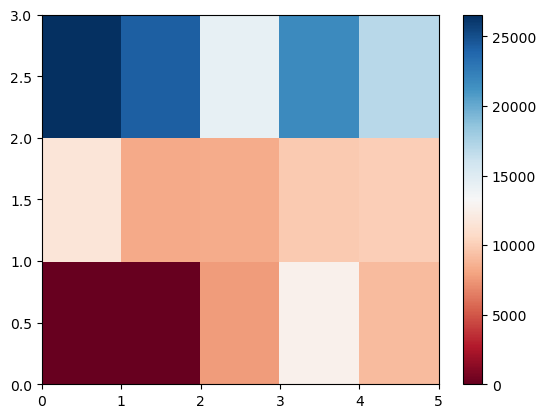

In [33]:
plt.pcolor(pivot, cmap='RdBu')
plt.colorbar()

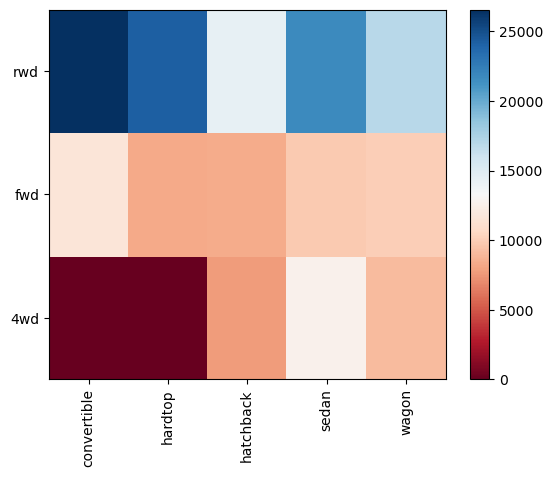

In [34]:
# Prettying the plot:
fig, ax = plt.subplots()
im = ax.pcolor(pivot, cmap='RdBu')

#label names
row_labels = pivot.columns.levels[1]
col_labels = pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">Correlation and Causation</h2>
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


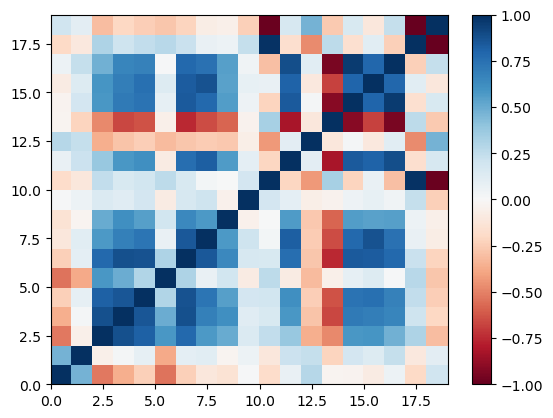

In [35]:
plt.pcolor(df.corr(),cmap='RdBu')
plt.colorbar()

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [36]:
from scipy import stats

In [37]:
# Example for the correlation between wheel base and price:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.4570195020504053e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

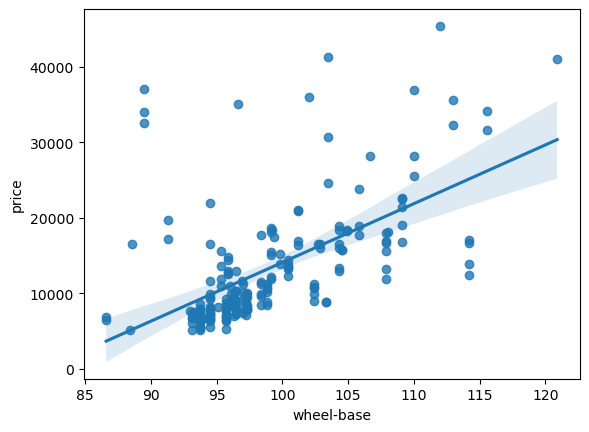

In [39]:
# To see it:
sns.regplot(x='wheel-base', y='price', data=df)

In [40]:
# Horsepwer vs price:
pearson_coef, p_value = stats.pearsonr(x=df['horsepower'],y=df['price'])
print(f'The pearson coefficient is {pearson_coef}, and the p value is {p_value}')

The pearson coefficient is 0.8096565575365611, and the p value is 1.0468839625927006e-47


Conclusion:
The p value is extremely small, and hence this is statistically significant, and the pearson coefficient is close to one, so we expect a strop positive linear relationship.

<AxesSubplot:xlabel='horsepower', ylabel='price'>

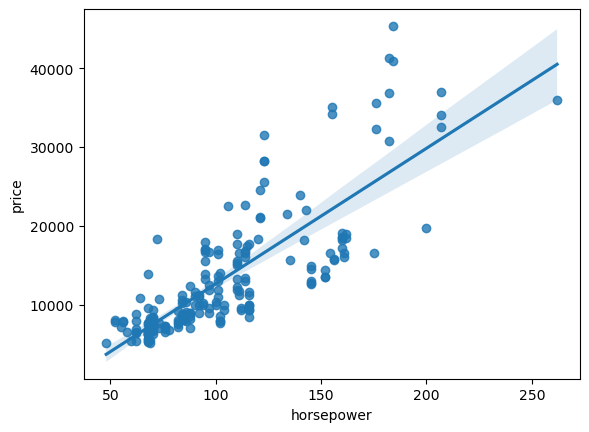

In [41]:
# Lets try it:
sns.regplot(x='horsepower',y='price',data=df)

* You can do the same for the other columns.

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>
<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [43]:
grouped_test2=temp[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
3,fwd,11595.000000
4,fwd,8249.000000
8,rwd,26563.250000
9,rwd,24202.714286


In [44]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 15.410141563686233 , P = 0.0008823074307056802


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


In [46]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 22.753469372233333 , P = 0.001408503348067567


In [47]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 11.764027680541242 , P = 0.013973361361845411


In [48]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.015958539708919313 , P = 0.9035999352040226


<h3>Conclusion: Important Variables</h3>
<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


In [53]:
from sklearn.linear_model import LinearRegression 

In [54]:
# creating the linear regression object:
lr = LinearRegression()

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


In [57]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'fuel-type-diesel',
       'fuel-type-gas'],
      dtype='object')

In [60]:
x = df[['highway-L/100km']]
y = df.price

In [61]:
lr.fit(x, y)

LinearRegression()

In [64]:
# getting predictions:
yhat = lr.predict(x)
print(yhat[0])  # Predicted value

# The real value:
df.price[0]

15496.768269294631


16500.0

<h3>What is the final estimated linear model we get?</h3>
$$
Yhat = a + b  X
$$


In [65]:
a = lr.intercept_
a

-14623.538605502386

In [67]:
b = lr.coef_
b[0]

3460.631002636253

Plugging the values, we get the following model:
<b>Price</b> = 3460.63 *  <b>highway-mpg</b>  - 14623.54 


In [68]:
price = 3460.63 * df['highway-L/100km'] - 14623.54

In [73]:
temp1 = price.to_frame()
temp1.rename(columns={'highway-L/100km': 'predicted price'}, inplace=True)
temp1

,predicted price
0,15496.758148
1,16655.231154
2,12484.728333
3,22342.280455
4,17906.382000
...,...
199,14421.033214
200,17906.382000
201,20735.070870
202,15496.758148


In [75]:
# comparing the actual with the predicted:
pd.concat([df.price.to_frame(), temp1], axis =1)

,price,predicted price
0,16500.0,15496.758148
1,16500.0,16655.231154
2,13950.0,12484.728333
3,17450.0,22342.280455
4,15250.0,17906.382000
...,...,...
199,16845.0,14421.033214
200,19045.0,17906.382000
201,21485.0,20735.070870
202,22470.0,15496.758148


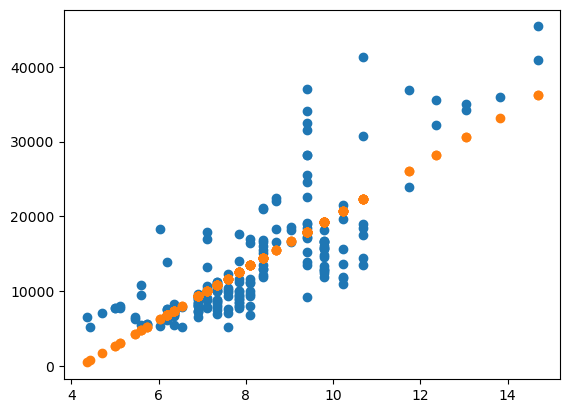

In [79]:
plt.scatter(df['highway-L/100km'],df.price)
plt.scatter(df['highway-L/100km'],temp1['predicted price'])

<h4>Multiple Linear Regression</h4>
<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [82]:
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
y = df.price

In [83]:
lr_multiple = LinearRegression()

In [84]:
lr_multiple.fit(x,y)

LinearRegression()

In [86]:
# The parameters:
lr_multiple.intercept_

-14383.74892984982

In [88]:
lr_multiple.coef_

array([ 36.62425112,   3.4945574 ,  85.37910132, 502.57298307])

In [97]:
temp2 = -14383.75 + 36.24 * df.horsepower + 3.49 * df['curb-weight'] + 85.38 * df['engine-size'] + 802.57 * df['highway-L/100km']
price_multiple = temp2.to_frame()
price_multiple.rename(columns={0:'predicted price'},inplace=True)

pd.concat([df.price, price_multiple], axis = 1)

,price,predicted price
0,16500.0,16616.141481
1,16500.0,21281.238077
2,13950.0,13062.078333
3,17450.0,19824.196818
4,15250.0,17507.918000
...,...,...
199,16845.0,18824.525357
200,19045.0,21638.398000
201,21485.0,23955.201739
202,22470.0,20050.451481


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

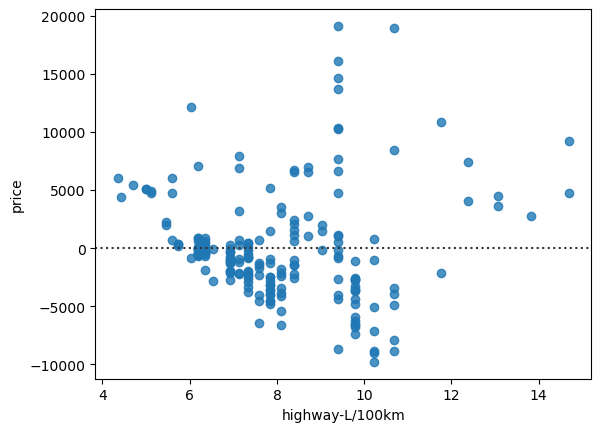

In [100]:
sns.residplot(x=df['highway-L/100km'], y=df.price, data=df)

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression Visualization</h3>
<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

* **Check the lab for details.**

<h2>Polynomial Regression and Pipelines</h2>
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>
